In [8]:
df = pd.read_csv("dataset/train.csv")
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [9]:
# df['age_group'] = pd.cut(df['age'],bins=[0,18,25,35,45,55,65,100],labels=['<18','18-24','25-34','35-44','45-54','55-64','65+'])
# df['balance_group'] = pd.cut(df['balance'],bins=[-1_000_000_000,0,1_000,5_000,10_000,1_000_000_000],labels=['<0', '0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k+'])
df['education'] = np.where(df['education']=='unknown', np.nan, df['education'])
df['has_loan'] = np.where((df['housing']=='yes') | (df['loan']=='yes'), 'yes', 'no')
df['contact'] = np.where(df['contact']=='unknown', np.nan, df['contact'])
# df['contact_day_category'] = pd.cut(df['day'],bins=[0,10,20,31],labels=['start-month','mid-month','end-month'])
df['has_contact'] = np.where(df['pdays'] != -1, 'yes','no')
df['balance_over_age'] = df['balance'] / df['age'] 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                750000 non-null  int64  
 1   age               750000 non-null  int64  
 2   job               750000 non-null  object 
 3   marital           750000 non-null  object 
 4   education         728701 non-null  object 
 5   default           750000 non-null  object 
 6   balance           750000 non-null  int64  
 7   housing           750000 non-null  object 
 8   loan              750000 non-null  object 
 9   contact           518373 non-null  object 
 10  day               750000 non-null  int64  
 11  month             750000 non-null  object 
 12  duration          750000 non-null  int64  
 13  campaign          750000 non-null  int64  
 14  pdays             750000 non-null  int64  
 15  previous          750000 non-null  int64  
 16  poutcome          75

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Y = df['y']
X = df.drop(columns=['y'])



# Num columns need to be standardized
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object))
)

In [21]:
preprocessing.get_feature_names_out()


array(['pipeline-1__id', 'pipeline-1__age', 'pipeline-1__balance',
       'pipeline-1__day', 'pipeline-1__duration', 'pipeline-1__campaign',
       'pipeline-1__pdays', 'pipeline-1__previous',
       'pipeline-1__balance_over_age', 'pipeline-2__job_admin.',
       'pipeline-2__job_blue-collar', 'pipeline-2__job_entrepreneur',
       'pipeline-2__job_housemaid', 'pipeline-2__job_management',
       'pipeline-2__job_retired', 'pipeline-2__job_self-employed',
       'pipeline-2__job_services', 'pipeline-2__job_student',
       'pipeline-2__job_technician', 'pipeline-2__job_unemployed',
       'pipeline-2__job_unknown', 'pipeline-2__marital_divorced',
       'pipeline-2__marital_married', 'pipeline-2__marital_single',
       'pipeline-2__education_primary', 'pipeline-2__education_secondary',
       'pipeline-2__education_tertiary', 'pipeline-2__default_no',
       'pipeline-2__default_yes', 'pipeline-2__housing_no',
       'pipeline-2__housing_yes', 'pipeline-2__loan_no',
       'pipeline-

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

rdf = make_pipeline(
    preprocessing,
    RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )
)
dct = make_pipeline(
    preprocessing,
    DecisionTreeClassifier(
        random_state=42,
        max_depth=5
    )
)
xgbst = make_pipeline(
    preprocessing,
    XGBClassifier(n_estimators=20, max_depth=5, learning_rate=0.001, objective='binary:logistic')

)

rdf.fit(X,Y)
dct.fit(X,Y)
xgbst.fit(X,Y)

,steps,"[('columntransformer', ...), ('xgbclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
X_test = pd.read_csv("dataset/test.csv")
X_test['has_loan'] = np.where((X_test['housing']=='yes') | (X_test['loan']=='yes'), 'yes', 'no')
X_test['has_contact'] = np.where(X_test['pdays'] != -1, 'yes','no')
X_test['balance_over_age'] = X_test['balance'] / X_test['age']

X_test 

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,has_loan,has_contact,balance_over_age
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,yes,no,43.656250
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,yes,no,0.522727
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,yes,no,1.277778
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,yes,no,-23.793103
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,yes,no,69.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown,yes,no,0.000000
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure,yes,yes,13.050000
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success,no,yes,0.523810
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown,yes,no,52.580000


In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, f1_score, recall_score, precision_score
def get_score_metrics(y_true, y_pred, y_proba):
    # Calculate metrics
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    roc_auc = roc_auc_score(y_true,y_proba)    
    
    # Print results
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    
def show_confusion_matrix(y_true, y_pred):
    labels = ['No', 'Yes']  # 0='No', 1='Yes'

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=labels,
        cmap=plt.cm.Blues,
        values_format='d'
    )

    fig = disp.figure_
    fig.set_figwidth(10)
    fig.set_figheight(10) 
    fig.suptitle('Plot of confusion matrix')

    # To show full numbers instead of scientific notation
    plt.show()



Precision: 1.0000
Recall:    0.9999
F1-Score:  1.0000
ROC-AUC:   1.0000


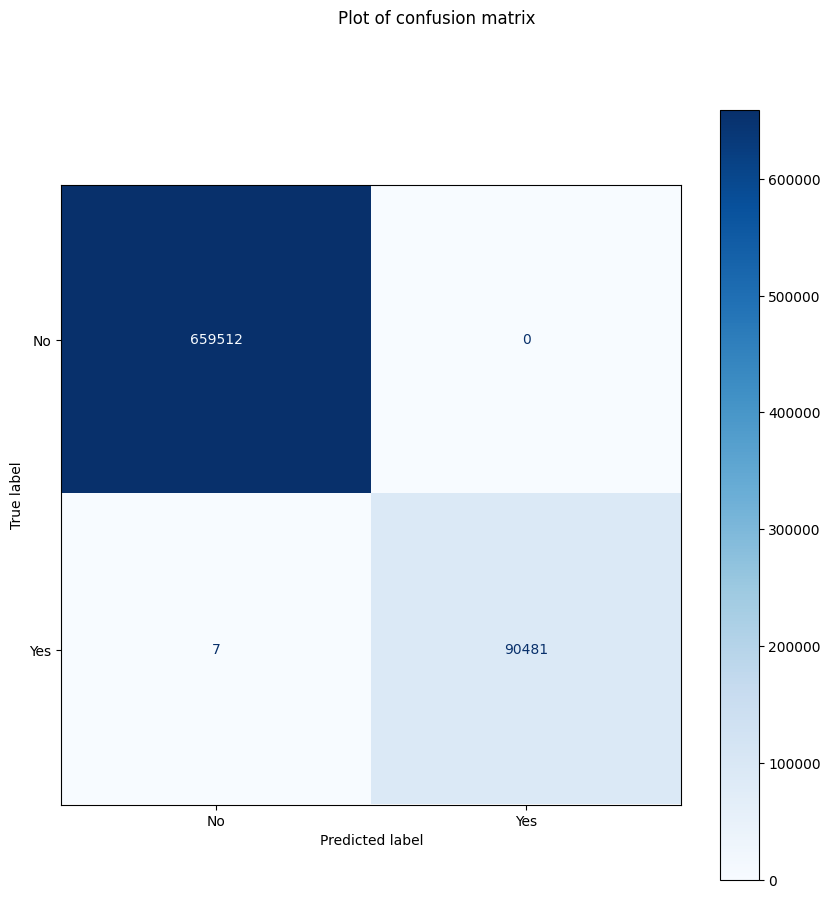

In [39]:
Y_pred = rdf.predict(X)
Y_proba = rdf.predict_proba(X)[:,1]
get_score_metrics(Y, Y_pred, Y_proba)
show_confusion_matrix(Y, Y_pred)



Precision: 0.7694
Recall:    0.3980
F1-Score:  0.5246
ROC-AUC:   0.9270


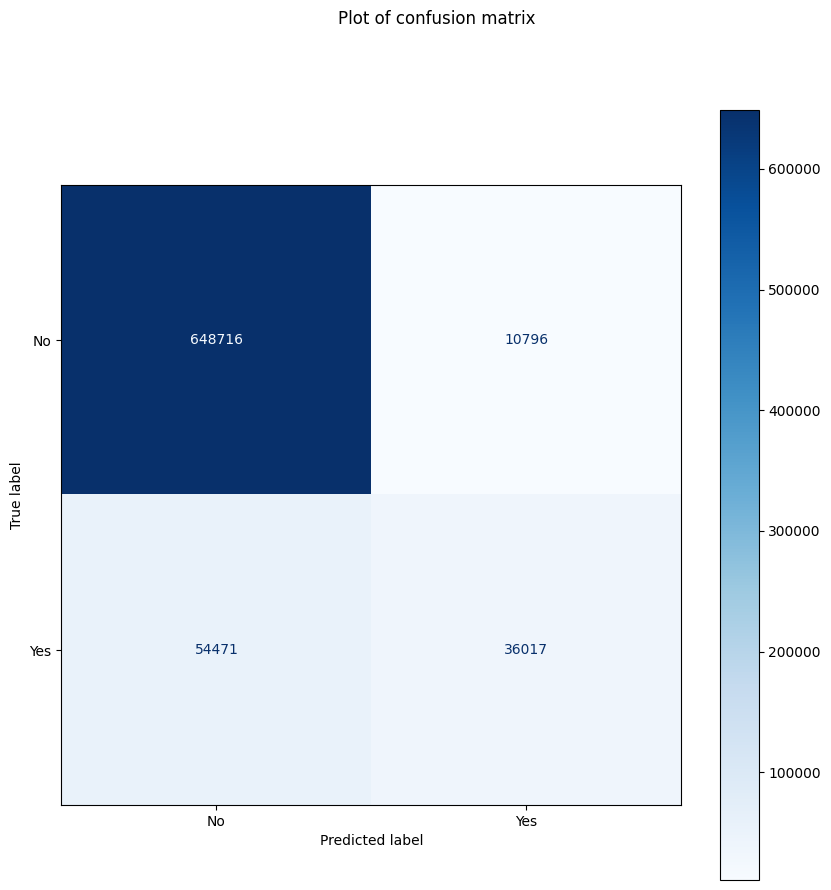

In [40]:


Y_pred = dct.predict(X)
Y_proba = dct.predict_proba(X)[:,1]

get_score_metrics(Y, Y_pred, Y_proba)
show_confusion_matrix(Y, Y_pred)



Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
ROC-AUC:   0.9277


/Users/hieutrinh358/projects/ai-ml-coaching-material/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


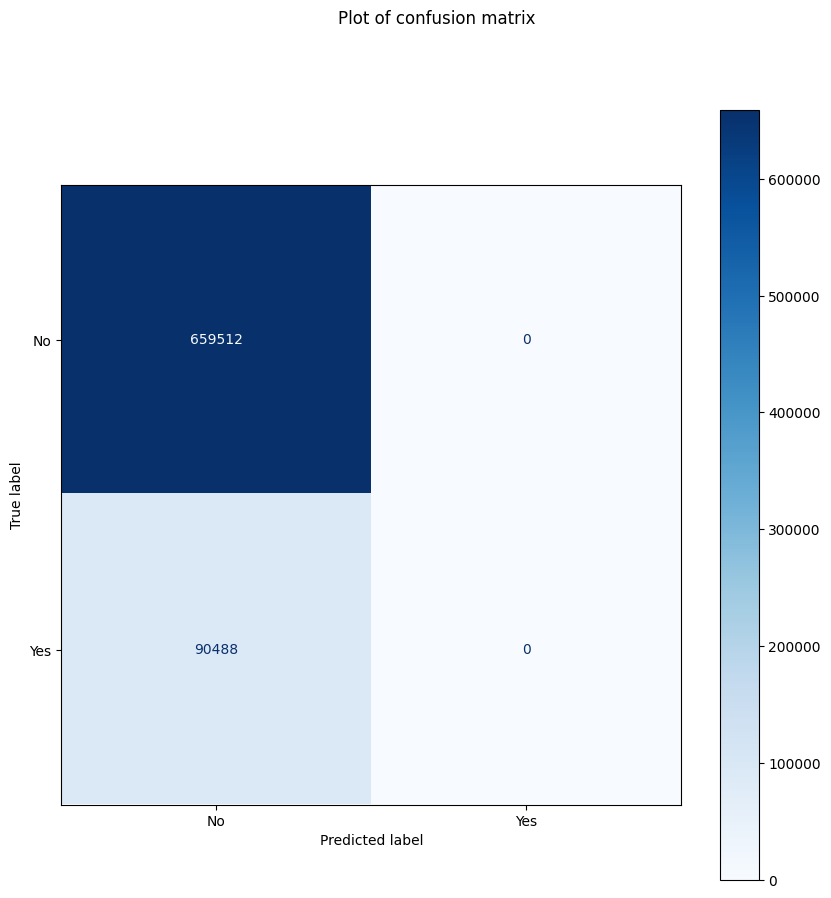

In [46]:


Y_pred = xgbst.predict(X)
Y_proba = xgbst.predict_proba(X)[:,1]

get_score_metrics(Y, Y_pred, Y_proba)
show_confusion_matrix(Y, Y_pred)

